In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sps

In [2]:
df_ISGs = pd.read_csv('../CSV_files/ISGs.csv')
df_Rand = pd.read_csv('../CSV_files/Random_Genes.csv')

In [4]:
df_ISGs.columns, df_Rand.columns = ['ID','Nseqs','M0','TreeL','P-val','2dLNL','M8'], ['ID','Nseqs','M0','TreeL','P-val','2dLNL','M8']
print df_ISGs.head()
print '\n'
print df_Rand.head()

       ID  Nseqs       M0    TreeL         P-val      2dLNL   M8
0    BST2     20  0.73156   1.6286  8.444900e-03   6.936600  yes
1  TRIM5_     17  1.16142  1.29457  4.290000e-18  75.185502  yes
2  TRIM56     19  0.07746  0.79052  4.534933e-01   0.561906  NaN
3  TRIM38     20  0.32685  0.67944  2.951337e-01   1.096054  NaN
4    IDO1     19  0.37517  0.80084  2.224475e-01   1.488512  NaN


        ID  Nseqs       M0    TreeL     P-val     2dLNL   M8
0    PYGO1     16  0.11171  0.26746  0.871442  0.026188  NaN
1  MSANTD3     13  0.04902  0.13291  0.863859  0.029400  NaN
2  PIP5K1A     16  0.05602  0.24939  0.701676  0.146734  NaN
3  FAM102A     20  0.06066  0.51489  0.691170  0.157822  NaN
4    GNAT3     19  0.04735  0.29761  0.690562  0.158478  NaN


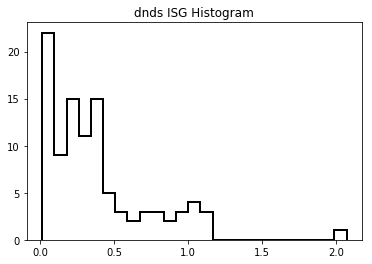

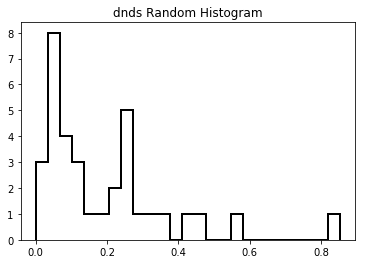

In [5]:

#dnds_vals = [_ for _ in np.nan_to_num(np.array(df['dN/dS M0'])) if _!=0]
dnds_ISGs = df_ISGs['M0']
dnds_Rand = df_Rand['M0']
plt.hist(dnds_ISGs,bins=25,histtype='step',lw=2,color='k')
plt.title('dnds ISG Histogram')
plt.show()

plt.hist(dnds_Rand,bins=25,histtype='step',lw=2,color='k')
plt.title('dnds Random Histogram')
plt.show()



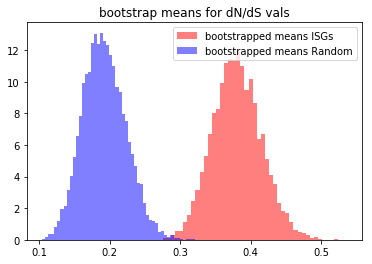

In [12]:

def bootstrap_samples_mean(array,nsamples=100):
    bootstrap_array = []
    for _ in range(nsamples):
        bootstrap_array.append(np.mean(np.random.choice(array,len(array),replace=True)))
    return bootstrap_array


bootstrap_mean_ISGs = bootstrap_samples_mean(dnds_ISGs,10000)
bootstrap_mean_Rand = bootstrap_samples_mean(dnds_Rand,10000)
plt.hist(bootstrap_mean_ISGs,bins=50,color='red',alpha=0.5,label='bootstrapped means ISGs',normed=True)
plt.hist(bootstrap_mean_Rand,bins=50,color='blue',alpha=0.5,label='bootstrapped means Random',normed=True)


plt.title('bootstrap means for dN/dS vals')
#plt.axvline(np.mean(dnds_vals),color='k',lw)
plt.legend()
plt.savefig('../Figures/bootstrap_mean_histograms.pdf')
plt.show()



In [13]:
false_pos_rate = len([_ for _ in bootstrap_mean_ISGs if _ < max(bootstrap_mean_Rand)])/float(len(bootstrap_mean_ISGs))
false_neg_rate = len([_ for _ in bootstrap_mean_Rand if _ > min(bootstrap_mean_ISGs)])/float(len(bootstrap_mean_Rand))

In [14]:
print false_neg_rate, false_pos_rate

0.0442 0.0374


In [15]:
# perform kolmogrov-smirnov test to test whether or not the two dNdS distributions are different:

sps.ks_2samp(dnds_ISGs,dnds_Rand)

Ks_2sampResult(statistic=0.34828188701223062, pvalue=0.0029386735410081269)